In [1]:
import torch
import numpy as np
from training import train
from data_utils import make_dataset, load_dataset, fit_dset_to_m
from controls import LQR
from tasks import stabilize_cartpole
from plotting import plot_trajectories, plot_experiment
from models import save_model, load_model
from experiments import run_experiment, save_experiment, load_experiment
import params
from IPython.display import HTML
from copy import deepcopy
import matplotlib.pyplot as plt
import seaborn as sns

######################
### DISPLAY CONFIG ###
######################
for name, values in vars(params).items():
    print(name, values)

torch.set_default_device("cuda")
#torch.set_default_device("cpu")

%load_ext autoreload
%autoreload 2

/home1/lutkus/cartpole_ae/plotting.py:72: SyntaxWarning: invalid escape sequence '\c'
  ax.set_title("$(V \circ E)(x)$ and $f(x, (\pi\circ E)(x))$, $\dot{x}_1=x_1=0$", fontsize=16)
/home1/lutkus/cartpole_ae/plotting.py:73: SyntaxWarning: invalid escape sequence '\d'
  ax.set_ylabel("$\dot{x}_2$", fontsize=16, labelpad=-8)
/home1/lutkus/cartpole_ae/plotting.py:79: SyntaxWarning: invalid escape sequence '\c'
  ax.set_title("$(V \circ E)(x)$ and $f(x, (\pi\circ E)(x))$, $\dot{x}_1=\dot{x}_2=0$", fontsize=16)
/home1/lutkus/cartpole_ae/plotting.py:82: SyntaxWarning: invalid escape sequence '\p'
  ax.quiver(XXb.cpu().detach().numpy(), YYb.cpu().detach().numpy(), fxu[:,0].cpu().detach().numpy(), fxu[:,1].cpu().detach().numpy(), label='$f(x,(\pi\circ E)(x))$',
/home1/lutkus/cartpole_ae/plotting.py:109: SyntaxWarning: invalid escape sequence '\p'
  ax.plot(Zi[:,0].cpu().detach().numpy(), Zi[:,1].cpu().detach().numpy(), alpha=0.25, label='$f_z(z,\pi(z))$',color='red')
/home1/lutkus/cartpole_ae/p

__name__ params
__doc__ None
__package__ 
__loader__ <_frozen_importlib_external.SourceFileLoader object at 0x7f96dc266bd0>
__spec__ ModuleSpec(name='params', loader=<_frozen_importlib_external.SourceFileLoader object at 0x7f96dc266bd0>, origin='/home1/lutkus/cartpole_ae/params.py')
__file__ /home1/lutkus/cartpole_ae/params.py
__cached__ /home1/lutkus/cartpole_ae/__pycache__/params.cpython-313.pyc
__builtins__ {'__name__': 'builtins', '__doc__': "Built-in functions, types, exceptions, and other objects.\n\nThis module provides direct access to all 'built-in'\nidentifiers of Python; for example, builtins.len is\nthe full name for the built-in function len().\n\nThis module is not normally accessed explicitly by most\napplications, but can be useful in modules that provide\nobjects with the same name as a built-in value, but in\nwhich the built-in of that name is also needed.", '__package__': '', '__loader__': <class '_frozen_importlib.BuiltinImporter'>, '__spec__': ModuleSpec(name='buil

In [2]:
#data = make_dataset(save=True, fname=params.dataset, render_mode=None, expert_controller=False)
data = load_dataset(fname=params.dataset)
X, U, Xtest, Utest = data
'''
data_rand = load_dataset(fname=params.dataset2)
X0, U0 = fit_dset_to_m(X[0], U[0])
X = (torch.vstack([X0,data_rand[0][0]]), torch.vstack([X[1],data_rand[0][1]]))
U = (torch.vstack([U0,data_rand[1][0]]), None)
Xtest0, Utest0 = fit_dset_to_m(Xtest[0], Utest[0])
Xtest = (torch.vstack([Xtest0,data_rand[2][0]]), torch.vstack([Xtest[1],data_rand[2][1]]))
Utest = (torch.vstack([Utest0,data_rand[3][0]]), None)
print("DSET SIZES:")
print(X[0].shape)
print(X[1].shape)
'''

'\ndata_rand = load_dataset(fname=params.dataset2)\nX0, U0 = fit_dset_to_m(X[0], U[0])\nX = (torch.vstack([X0,data_rand[0][0]]), torch.vstack([X[1],data_rand[0][1]]))\nU = (torch.vstack([U0,data_rand[1][0]]), None)\nXtest0, Utest0 = fit_dset_to_m(Xtest[0], Utest[0])\nXtest = (torch.vstack([Xtest0,data_rand[2][0]]), torch.vstack([Xtest[1],data_rand[2][1]]))\nUtest = (torch.vstack([Utest0,data_rand[3][0]]), None)\nprint("DSET SIZES:")\nprint(X[0].shape)\nprint(X[1].shape)\n'

torch.Size([500000, 10, 4])
torch.Size([5000000, 2, 4])
ENCODER


### Layer 0 ###
Not residual
g init is <function xavier_uniform_ at 0x7f95ae30b740>
g bias init is nn.init.zeros


### Layer 1 ###
Not residual
g init is <function xavier_uniform_ at 0x7f95ae30b740>
g bias init is nn.init.zeros


DECODER


### Layer 0 ###
Not residual
g init is <function xavier_uniform_ at 0x7f95ae30b740>
g bias init is nn.init.zeros


### Layer 1 ###
Not residual
g init is <function xavier_uniform_ at 0x7f95ae30b740>
g bias init is nn.init.zeros


LATENT DRIFT


### Layer 0 ###
Not residual
g init is <function xavier_uniform_ at 0x7f95ae30b740>
g bias init is <function uniform_ at 0x7f95ae30b100>


### Layer 1 ###
Not residual
g init is <function xavier_uniform_ at 0x7f95ae30b740>
g bias init is <function uniform_ at 0x7f95ae30b100>


LATENT CONTROL


### Layer 0 ###
Not residual
g init is <function xavier_uniform_ at 0x7f95ae30b740>
g bias init is <function zeros_ at 0x7f95ae30b4c0>


### Layer 1 ###
N

  0%|          | 1/500 [00:00<07:23,  1.13it/s]

ep 0: train 0.009627633728086948    test 0.02093188278377056
rec 0.003635551081970334    mstep 0.005992081016302109    jac 0.0
horizon is now 2


  0%|          | 2/500 [00:01<06:58,  1.19it/s]

horizon is now 3


  1%|          | 3/500 [00:02<07:25,  1.11it/s]

horizon is now 4


  1%|          | 4/500 [00:03<08:00,  1.03it/s]

horizon is now 5


  1%|          | 5/500 [00:04<08:26,  1.02s/it]

horizon is now 6


  1%|          | 6/500 [00:06<09:01,  1.10s/it]

horizon is now 7


  1%|▏         | 7/500 [00:07<09:35,  1.17s/it]

horizon is now 8


  2%|▏         | 8/500 [00:08<10:05,  1.23s/it]

horizon is now 9


100%|██████████| 500/500 [11:48<00:00,  1.42s/it]

ep 499: train 5.043495548306964e-06    test 6.648326234426349e-06
rec 4.0469251416652696e-07    mstep 4.638803602574626e-06    jac 0.0


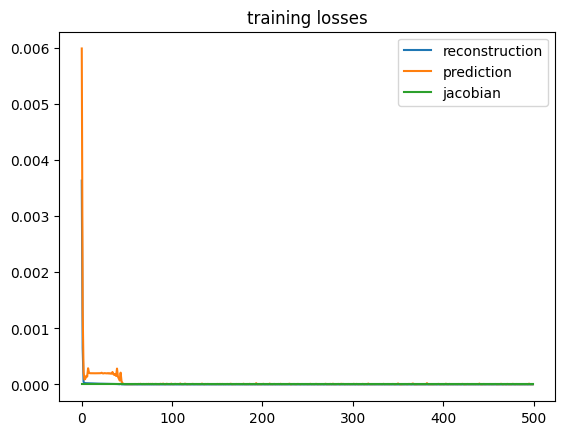

MovieWriter ffmpeg unavailable; using Pillow instead.
100%|██████████| 100/100 [00:03<00:00, 26.96it/s]


0.3401643


100%|██████████| 100/100 [00:04<00:00, 23.44it/s]


0.44112372


100%|██████████| 100/100 [00:04<00:00, 23.46it/s]


0.37246263


100%|██████████| 100/100 [00:04<00:00, 20.95it/s]


0.107684545


100%|██████████| 100/100 [00:05<00:00, 19.70it/s]


0.13630371


100%|██████████| 100/100 [00:05<00:00, 19.29it/s]


0.3358279


100%|██████████| 100/100 [00:05<00:00, 18.11it/s]


0.43935624


100%|██████████| 100/100 [00:05<00:00, 16.93it/s]


1.4977913


100%|██████████| 100/100 [00:05<00:00, 18.03it/s]


0.6692656


100%|██████████| 100/100 [00:06<00:00, 16.66it/s]


0.40818813


100%|██████████| 100/100 [00:06<00:00, 16.03it/s]


0.15760665


100%|██████████| 100/100 [00:05<00:00, 16.73it/s]


0.3520922


100%|██████████| 100/100 [00:05<00:00, 16.73it/s]


0.24048968


100%|██████████| 100/100 [00:06<00:00, 15.14it/s]


1.0129038


100%|██████████| 100/100 [00:06<00:00, 15.36it/s]


1.4028856


100%|██████████| 100/100 [00:06<00:00, 14.87it/s]


1.0322595


100%|██████████| 100/100 [00:06<00:00, 14.60it/s]


2.4605293


100%|██████████| 100/100 [00:07<00:00, 14.11it/s]


0.52274835


100%|██████████| 100/100 [00:06<00:00, 14.87it/s]


1.1748856


100%|██████████| 100/100 [00:07<00:00, 14.10it/s]


0.7311931


100%|██████████| 100/100 [00:07<00:00, 13.83it/s]


1.0054618


100%|██████████| 100/100 [00:06<00:00, 14.73it/s]


0.3289133


100%|██████████| 100/100 [00:07<00:00, 13.10it/s]


1.2913324


100%|██████████| 100/100 [00:06<00:00, 14.91it/s]


0.5173906


100%|██████████| 100/100 [00:07<00:00, 12.93it/s]


1.7342021


100%|██████████| 100/100 [00:07<00:00, 13.09it/s]


0.54994124


100%|██████████| 100/100 [00:08<00:00, 12.42it/s]


2.2072322


100%|██████████| 100/100 [00:08<00:00, 11.68it/s]


2.7032936


100%|██████████| 100/100 [00:07<00:00, 12.65it/s]


0.8417164


100%|██████████| 100/100 [00:08<00:00, 11.57it/s]


1.9862772


100%|██████████| 100/100 [00:08<00:00, 11.94it/s]


2.4798863


100%|██████████| 100/100 [00:08<00:00, 11.42it/s]


1.9527835


100%|██████████| 100/100 [00:08<00:00, 11.85it/s]


2.137286


100%|██████████| 100/100 [00:08<00:00, 11.69it/s]


1.5268856


100%|██████████| 100/100 [00:09<00:00, 10.74it/s]


3.742501


100%|██████████| 100/100 [00:09<00:00, 11.01it/s]


2.6771472


100%|██████████| 100/100 [00:09<00:00, 10.73it/s]


2.1075408


100%|██████████| 100/100 [00:09<00:00, 10.88it/s]


2.3778982


100%|██████████| 100/100 [00:09<00:00, 10.89it/s]


2.6845999


100%|██████████| 100/100 [00:09<00:00, 10.24it/s]


2.6441965


100%|██████████| 100/100 [00:09<00:00, 10.87it/s]


1.2885464


100%|██████████| 100/100 [00:09<00:00, 10.33it/s]


2.0092883


100%|██████████| 100/100 [00:09<00:00, 10.71it/s]


3.6635065


100%|██████████| 100/100 [00:10<00:00,  9.88it/s]


3.321491


100%|██████████| 100/100 [00:09<00:00, 10.09it/s]


3.9599152


100%|██████████| 100/100 [00:10<00:00,  9.70it/s]


3.934608


100%|██████████| 100/100 [00:09<00:00, 10.03it/s]


2.6124663


100%|██████████| 100/100 [00:09<00:00, 11.05it/s]


2.7959554


100%|██████████| 100/100 [00:10<00:00,  9.61it/s]


3.4624717


100%|██████████| 100/100 [00:10<00:00,  9.42it/s]


3.0074716


100%|██████████| 100/100 [00:10<00:00,  9.75it/s]


3.7703555


100%|██████████| 100/100 [00:10<00:00,  9.42it/s]


5.2287545


100%|██████████| 100/100 [00:10<00:00,  9.53it/s]


5.030493


100%|██████████| 100/100 [00:10<00:00,  9.29it/s]


4.1361346
ENCODER


### Layer 0 ###
Not residual
g init is <function xavier_uniform_ at 0x7f95ae30b740>
g bias init is nn.init.zeros


### Layer 1 ###
Not residual
g init is <function xavier_uniform_ at 0x7f95ae30b740>
g bias init is nn.init.zeros


DECODER


### Layer 0 ###
Not residual
g init is <function xavier_uniform_ at 0x7f95ae30b740>
g bias init is nn.init.zeros


### Layer 1 ###
Not residual
g init is <function xavier_uniform_ at 0x7f95ae30b740>
g bias init is nn.init.zeros


LATENT DRIFT


### Layer 0 ###
Not residual
g init is <function xavier_uniform_ at 0x7f95ae30b740>
g bias init is <function uniform_ at 0x7f95ae30b100>


### Layer 1 ###
Not residual
g init is <function xavier_uniform_ at 0x7f95ae30b740>
g bias init is <function uniform_ at 0x7f95ae30b100>


LATENT CONTROL


### Layer 0 ###
Not residual
g init is <function xavier_uniform_ at 0x7f95ae30b740>
g bias init is <function zeros_ at 0x7f95ae30b4c0>


### Layer 1 ###
Not residual
g init is <function xavier_uniform

  0%|          | 1/500 [00:00<08:07,  1.02it/s]

ep 0: train 0.013838939368724823    test 0.024227159097790718
rec 0.004701480735093355    mstep 0.00913745816797018    jac 0.0
horizon is now 2


  0%|          | 2/500 [00:02<08:46,  1.06s/it]

horizon is now 3


  1%|          | 3/500 [00:03<09:48,  1.18s/it]

horizon is now 4


  1%|          | 4/500 [00:04<10:56,  1.32s/it]

horizon is now 5


  1%|          | 5/500 [00:06<12:06,  1.47s/it]

horizon is now 6


  1%|          | 6/500 [00:08<13:14,  1.61s/it]

horizon is now 7


  1%|▏         | 7/500 [00:10<14:17,  1.74s/it]

horizon is now 8


  2%|▏         | 8/500 [00:12<15:09,  1.85s/it]

horizon is now 9


100%|██████████| 500/500 [17:50<00:00,  2.14s/it]

ep 499: train 2.7857393433805555e-05    test 6.977969860599842e-06
rec 4.85592465793161e-07    mstep 2.7371797841624357e-05    jac 0.0


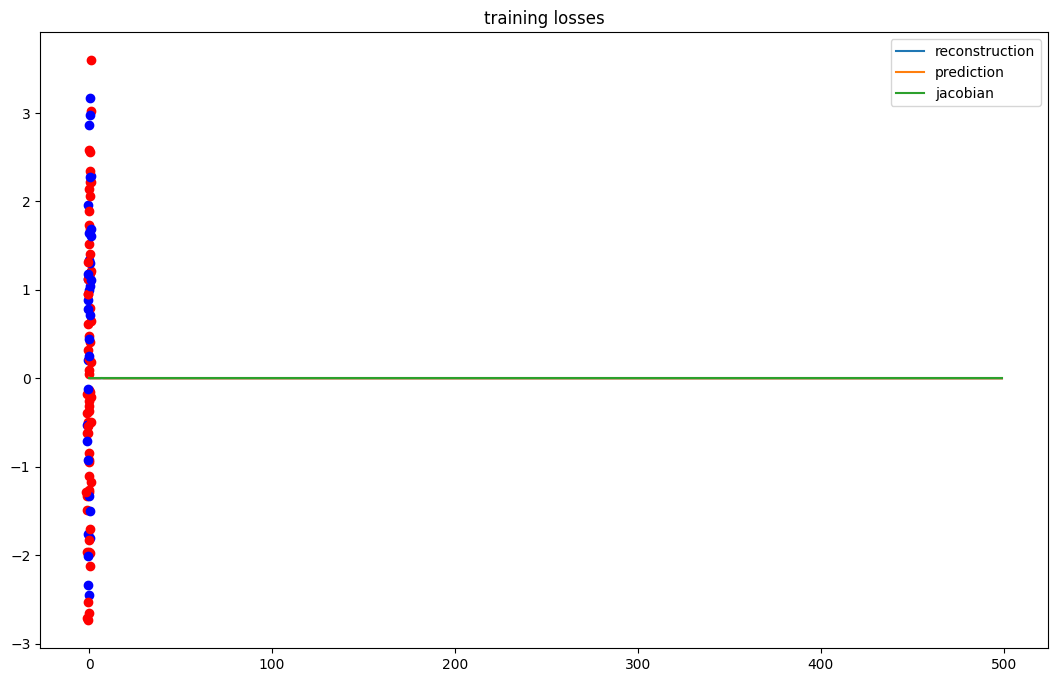

MovieWriter ffmpeg unavailable; using Pillow instead.
100%|██████████| 100/100 [00:04<00:00, 24.83it/s]


0.11668063


100%|██████████| 100/100 [00:04<00:00, 23.16it/s]


0.43773773


100%|██████████| 100/100 [00:04<00:00, 20.54it/s]


0.25071353


100%|██████████| 100/100 [00:04<00:00, 23.11it/s]


0.07793303


100%|██████████| 100/100 [00:04<00:00, 21.85it/s]


0.40094388


100%|██████████| 100/100 [00:04<00:00, 21.42it/s]


0.19893482


100%|██████████| 100/100 [00:04<00:00, 20.51it/s]


0.19957195


100%|██████████| 100/100 [00:04<00:00, 20.31it/s]


0.4432825


100%|██████████| 100/100 [00:04<00:00, 20.06it/s]


0.040369462


100%|██████████| 100/100 [00:04<00:00, 20.33it/s]


0.10870543


100%|██████████| 100/100 [00:05<00:00, 19.31it/s]


0.39008927


100%|██████████| 100/100 [00:05<00:00, 19.90it/s]


0.5088576


100%|██████████| 100/100 [00:04<00:00, 20.10it/s]


0.083349526


100%|██████████| 100/100 [00:05<00:00, 18.74it/s]


0.071382545


100%|██████████| 100/100 [00:05<00:00, 18.81it/s]


0.39458618


100%|██████████| 100/100 [00:05<00:00, 19.87it/s]


0.06446874


100%|██████████| 100/100 [00:05<00:00, 18.56it/s]


0.13788551


100%|██████████| 100/100 [00:05<00:00, 18.43it/s]


0.42503306


100%|██████████| 100/100 [00:05<00:00, 18.66it/s]


0.35396504


100%|██████████| 100/100 [00:05<00:00, 18.13it/s]


0.7667566


100%|██████████| 100/100 [00:05<00:00, 18.88it/s]


0.22624958


100%|██████████| 100/100 [00:05<00:00, 18.95it/s]


0.3665964


100%|██████████| 100/100 [00:05<00:00, 18.27it/s]


0.22694114


100%|██████████| 100/100 [00:05<00:00, 19.88it/s]


0.3520762


100%|██████████| 100/100 [00:05<00:00, 18.66it/s]


0.25332078


100%|██████████| 100/100 [00:05<00:00, 17.55it/s]


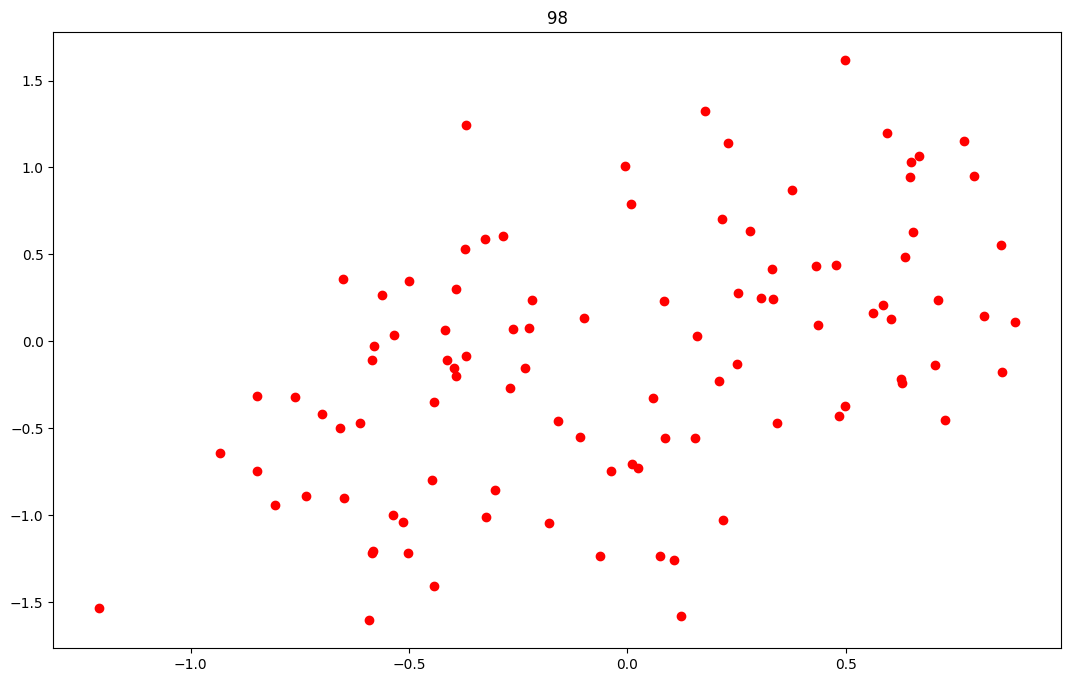

In [3]:
# TRAIN MODEL #
print(X[0].shape)
print(X[1].shape)

'''
params.penalize_rec = params.penalize_rec_schedule[0]
params.predict_mstep = params.predict_mstep_schedule[0]
params.penalize_reproj = params.penalize_reproj_schedule[0]
params.penalize_encoder_diagram_mstep = params.penalize_encoder_diagram_mstep_schedule[0]

ae, fdyn, ae_opt, fdyn_opt, ae_list, fdyn_list, rewards_current_run, completion_rate_current_run = train(X, U, Xtest, Utest)
ae, fdyn, ae_opt, fdyn_opt, ae_list, fdyn_list, rewards = train(X, U, Xtest, Utest, ae_0=(ae, ae_opt), fdyn_0=(fdyn, fdyn_opt))
'''
experiment = run_experiment([X, U, Xtest, Utest], "xxs_pert_exp", save=True, n_runs=[1, 0, 1])

# LOAD FROM CHECKPOINT #
#ae, fdyn, ae_opt, fdyn_opt = load_model(fname=params.load_name)
#ae, fdyn, ae_opt, fdyn_opt, ae_list, fdyn_list = train(X, U, Xtest, Utest, ae_0=(ae, ae_opt), fdyn_0=(fdyn, fdyn_opt))

# SAVE # 
#save_model((ae, fdyn), (ae_opt, fdyn_opt), fname=params.save_name)                                  
#ae_latest = deepcopy(ae)
#fdyn_latest = deepcopy(fdyn)

In [3]:
#name = "test_exp"
#name = "backwards-both_runs"
#name = 'both_runs'
#name="small_pert"
#name = "extra_small_pert"
nam = "xxs_pert_exp"
experiment = load_experiment(name)

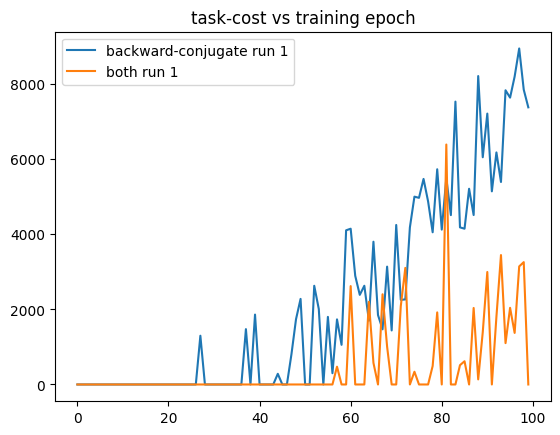

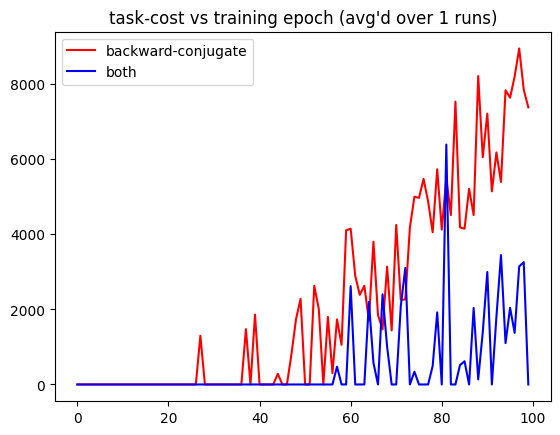

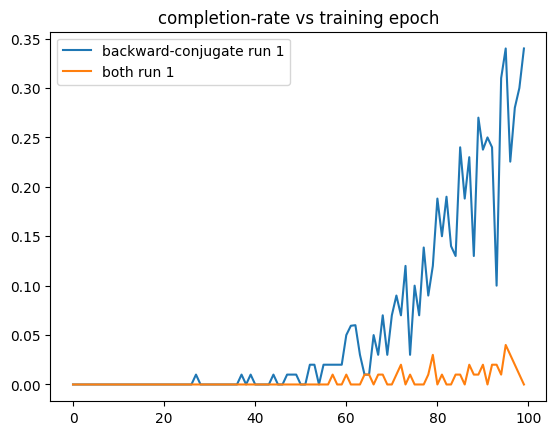

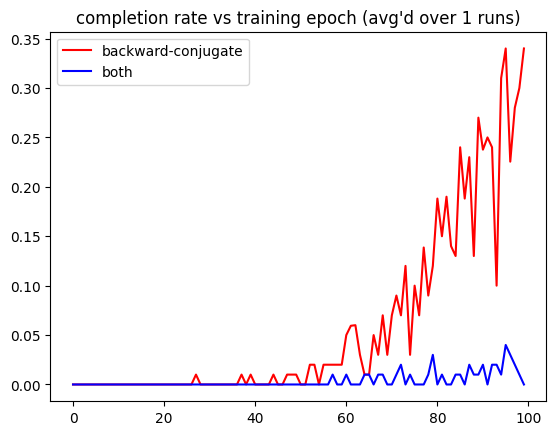

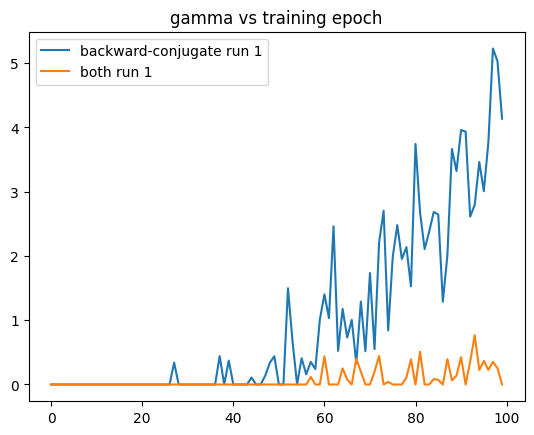

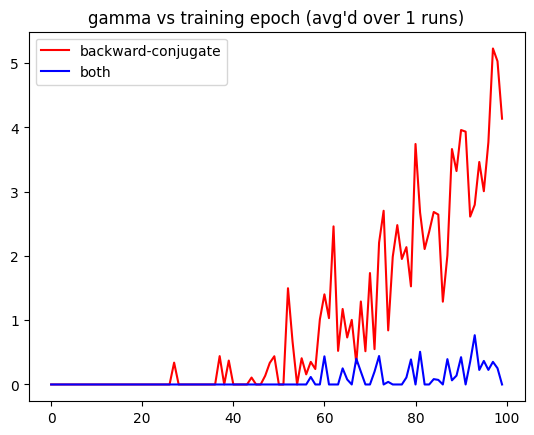

In [4]:
#######################
### Plot Experiment ###
#######################

plot_experiment(experiment)


In [37]:
#ae_list_config, fdyn_list_config, rewards_config, completion_rate_config, cfg = experiment

In [30]:
##############################
### Preserve Latest Models ###
##############################

ae = experiment["ae_list"][2][0][75]
fdyn = experiment["fdyn_list"][2][0][75]
#ae = experiment["ae_list"][0][2][80]
#fdyn = experiment["fdyn_list"][0][2][80]
#ae_list = ae_list_config[-1]
#fdyn_list = fdyn_list_config[-1]
#ae_latest = deepcopy(ae)
#fdyn_latest = deepcopy(fdyn)

In [5]:
ae = experiment["ae"][2][0]
ae_opt = experiment["ae_opt"][2][0]
fdyn = experiment["fdyn"][2][0]
fdyn_opt = experiment["fdyn_opt"][2][0]
'''
lqr = LQR(ae, fdyn)
#data_lqr = make_dataset(save=True, fname=params.dataset_finetune, render_mode=None, controller=lqr, ae=ae)
data_lqr = load_dataset(fname=params.dataset_finetune)
X_lqr, U_lqr, Xtest_lqr, Utest_lqr = data_lqr

#X_lqr.requires
ae, fdyn, ae_opt, fdyn_opt, ae_list, fdyn_list = train(X_lqr, U_lqr, Xtest_lqr, Utest_lqr, ae_0=(ae, ae_opt), fdyn_0=(fdyn, fdyn_opt))
'''

'\nlqr = LQR(ae, fdyn)\n#data_lqr = make_dataset(save=True, fname=params.dataset_finetune, render_mode=None, controller=lqr, ae=ae)\ndata_lqr = load_dataset(fname=params.dataset_finetune)\nX_lqr, U_lqr, Xtest_lqr, Utest_lqr = data_lqr\n\n#X_lqr.requires\nae, fdyn, ae_opt, fdyn_opt, ae_list, fdyn_list = train(X_lqr, U_lqr, Xtest_lqr, Utest_lqr, ae_0=(ae, ae_opt), fdyn_0=(fdyn, fdyn_opt))\n'

In [ ]:
####################
### Select Model ###
####################

MODEL_IND = 8

if MODEL_IND is not None:
    ae = ae_list[MODEL_IND]
    fdyn = fdyn_list[MODEL_IND]
else:
    ae = ae_latest
    fdyn = fdyn_latest



In [ ]:
############################
### Encoder Diagram Loss ###
############################

from videos import encoder_diagram_video

encoder_diagram_video(ae_list, fdyn_list, eps=np.pi/3)


In [67]:
####################
### Remake Video ###
####################

from videos import latent_space_video
    
latent_space_video(ae_list, fdyn_list)


NameError: name 'ae_list' is not defined

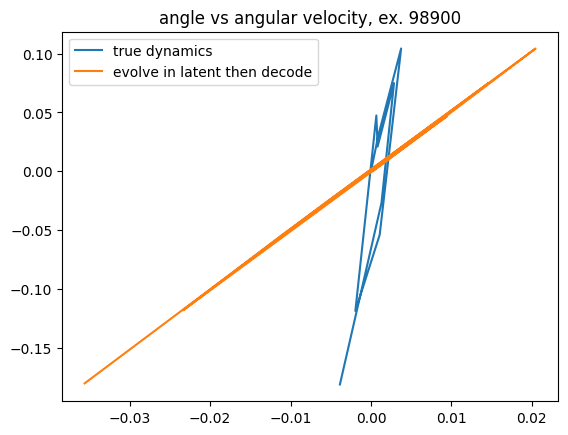

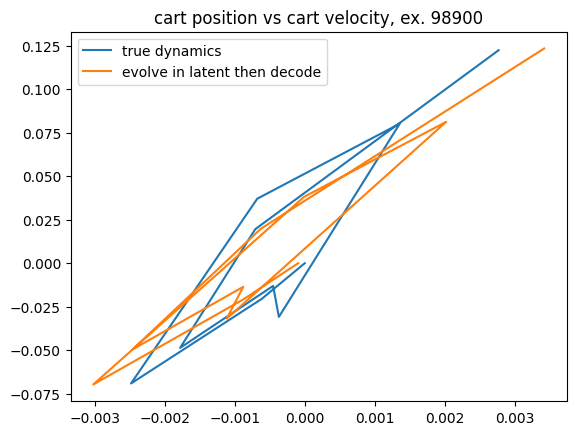

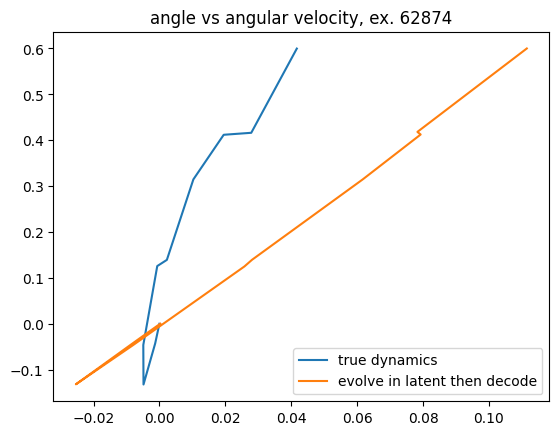

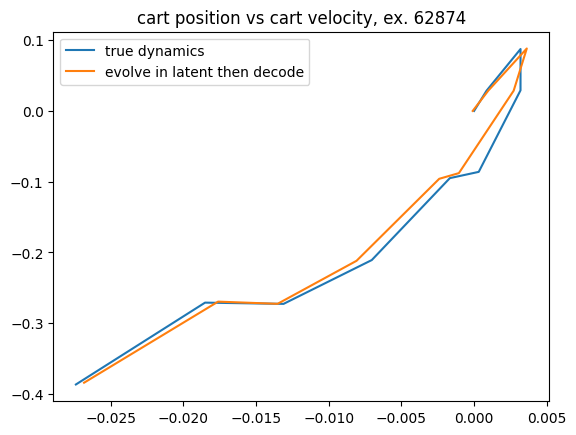

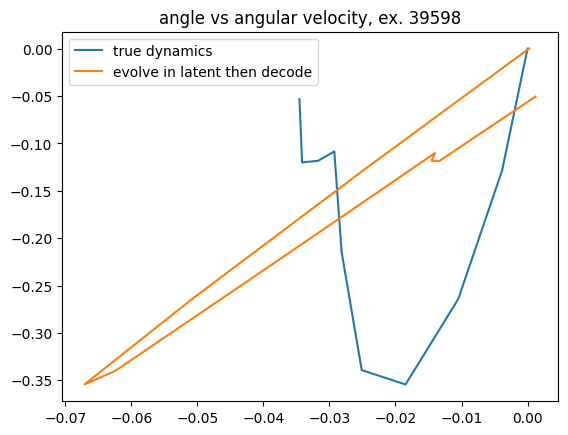

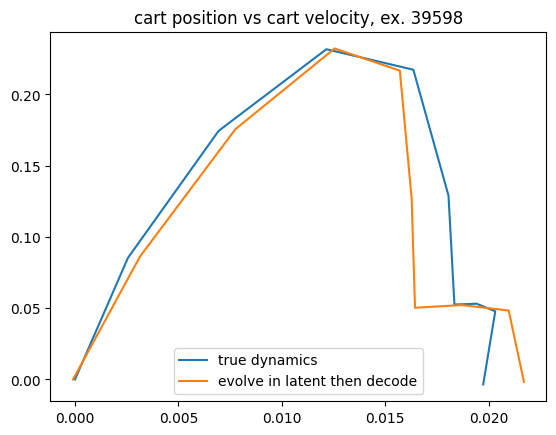

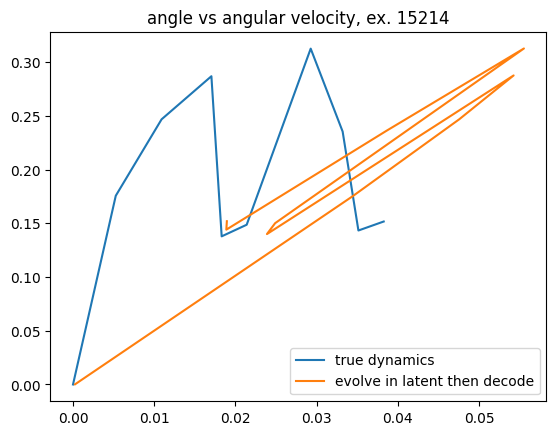

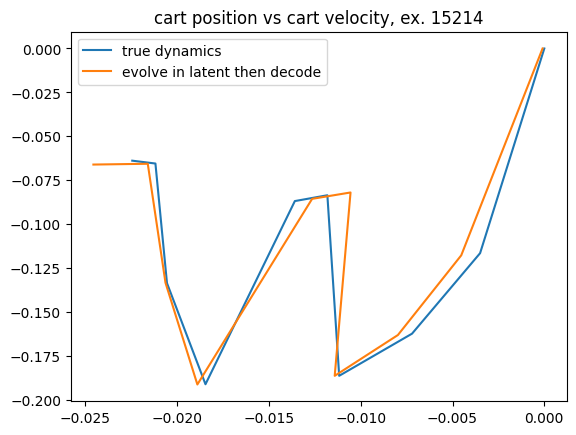

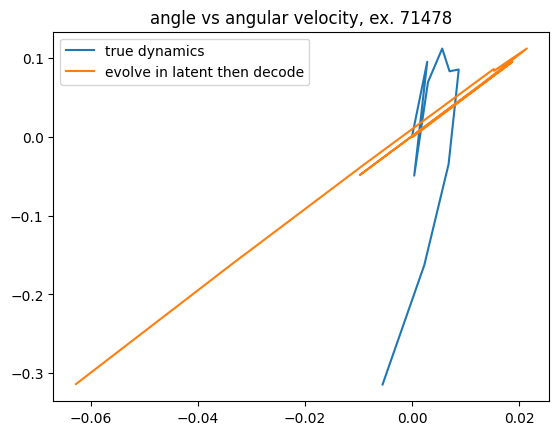

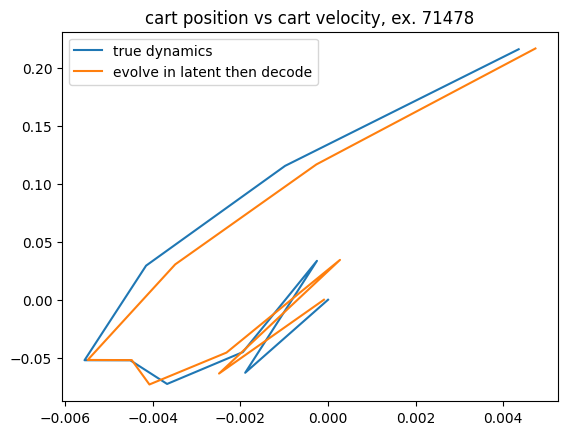

In [31]:
plot_trajectories(ae, fdyn, Xtest[0], Utest[0], 5, steps=15)#params.m+1)

In [ ]:
'''
ae.eval()
with torch.no_grad():
    rand_x = X.reshape(-1, params.d_x) #torch.randn(size=(100, 4))
    print(torch.mean(torch.linalg.norm(ae(rand_x)[:,2:]-rand_x[:,2:], dim=1)))
    print(torch.mean(torch.linalg.norm(X.reshape(-1, params.d_x)[:,2:], dim=1)))
'''  
from plotting import plot_stability
n_pts = 5000
eps = np.pi/6 #np.pi/3 
T = 500
tol = np.pi/2
low = [0+-eps, -eps, -eps, -eps]
high = [0+eps, eps, eps, eps]
plot_stability(ae, fdyn, n_pts, low, high, tol, T, visualize=False, latent_traj=True)

In [ ]:
##############################################
### Plot Inverse Image of Latent Norm Ball ###
##############################################

from plotting import plot_preimage_norm_ball

n = 10000
i = 1
j = 2
ivals = [0.]
jvals = [0.]
for ival in ivals:
    for jval in jvals:
        plot_preimage_norm_ball(ae, 0.25, i=i, ival=ival, j=j, jval=jval, n=n) #0.25

z_eq tensor([[-0.0003, -0.0003]], device='cuda:0', grad_fn=<AddmmBackward0>)


100%|██████████| 500/500 [00:28<00:00, 17.42it/s]


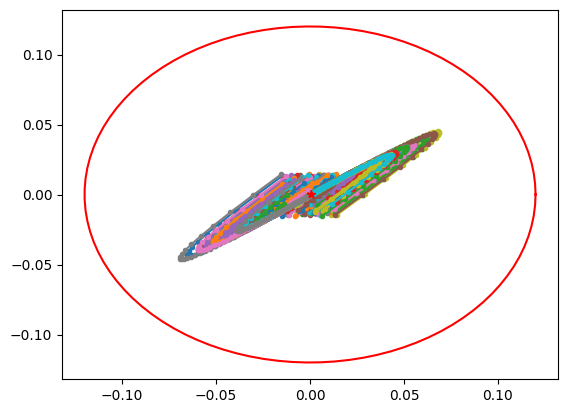

100%|██████████| 500/500 [00:27<00:00, 18.00it/s]


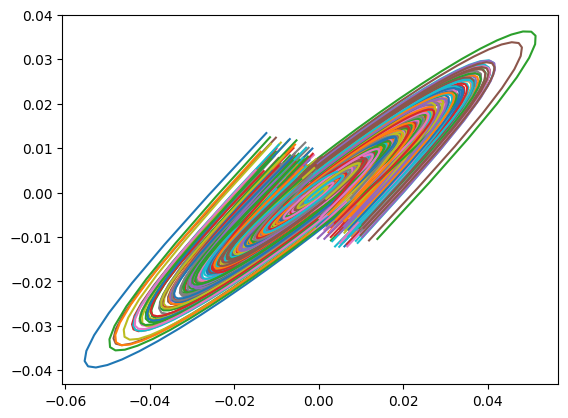

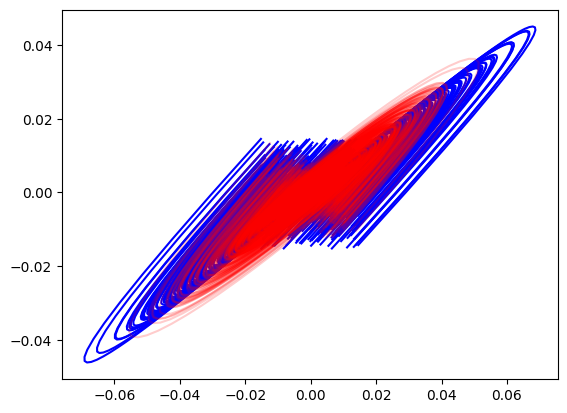

x data (500, 101, 4)
z data (500, 101, 2)
z proj data (500, 101, 2)
u data (500, 100, 1)
gamma forward 0.0021364414
gamma backward 0.030121826


In [35]:
####################################
### Initialize Data for Lyapunov ###
####################################

from plotting import plot_latent_trajectories
from utils import rollout_trajectories

r = 1.2e-1#2e-3 #1e-3
r_test = r #1e-3 #5e-3
rz_init = 0.03
rx_init = rz_init
rz_proj_init = 0.02
n_traj = 500
T = 100
b = ae.encode(torch.tensor(4*[0.,])).cpu().detach().numpy()

pts, z_data = plot_latent_trajectories(ae, fdyn, rz_init, n_traj, T=T, plot_quadratic=True, origin_spec=(b, r)) #r=0.05

lqr = LQR(ae, fdyn)
x_data, z_proj_data, u_data, gammas = rollout_trajectories (ae, fdyn, lqr, rz_proj_init, rz_proj_init, plot=True, n_traj=n_traj, T=T)
gamma_fwd, gamma_bwd = gammas

for zi in z_data:
    plt.plot(zi[:,0], zi[:,1], 'b-')
for zi in z_proj_data:
    plt.plot(zi[:,0], zi[:,1], 'r-', alpha=0.2)
plt.show()

u_data = u_data[...,np.newaxis]

#print(pts.shape)
print("x data", x_data.shape)
print("z data", z_data.shape)
print("z proj data", z_proj_data.shape)
print("u data", u_data.shape)
print("gamma forward", gamma_fwd)
print("gamma backward", gamma_bwd)

In [ ]:
##############################
### FINETUNING ON LQR DATA ###
##############################

params.learn_drift = False
params.m_schedule=15*[0]
params.m=15
print("before:")
print(x_data.shape)
print(u_data.shape)
x_data_windows = []
u_data_windows = []
for i in range(x_data.shape[1] // params.m):
    begin_x = int(i*(params.m+1))
    end_x = begin_x+params.m+1
    begin_u = int(i*params.m)
    end_u = begin_u + params.m 
    x_data_windows.append(x_data[:,begin_x:end_x])
    u_data_windows.append(u_data[:,begin_u:end_u])
x_data_lqr = np.vstack(x_data_windows)
u_data_lqr = np.vstack(u_data_windows)
print("after:")
print(x_data_lqr.shape)
print(u_data_lqr.shape)
X_lqr = [torch.tensor(x_data_lqr).float(), torch.tensor(x_data_lqr).float()]
U_lqr = [torch.tensor(u_data_lqr).float(), None]
for X_lqr_i in X_lqr:
    X_lqr_i.requires_grad = True
U_lqr[0].requires_grad = True
Xtest_lqr = X_lqr
Utest_lqr = U_lqr
for a in Xtest_lqr:
    print(a.requires_grad)
print(Utest_lqr[0].requires_grad)
#params.m_schedule = (X_lqr[0].shape[2]-1)*[0]
#params.m = X_lqr[0].shape[2]-1
ae, fdyn, ae_opt, fdyn_opt, ae_list, fdyn_list = train(X_lqr, U_lqr, Xtest_lqr, Utest_lqr, ae_0=(ae, ae_opt), fdyn_0=(fdyn, fdyn_opt))

pd loss: False
dyn loss: True
lb loss False
grad loss False
rho: 0.95
c lb 0.1
l_dyn 10
l_pd 1
l_lb 1
l_grad 1e-06
using grid data, grid_density: 100
features: 128
Lyapunov(
  (layers): ModuleList(
    (0): Linear(in_features=2, out_features=128, bias=True)
    (1): Tanh()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): Tanh()
    (4): Linear(in_features=128, out_features=4, bias=True)
  )
)
it 0: tensor([0.0026], device='cuda:0', grad_fn=<AddBackward0>)
it 1000: tensor([7.4980e-09], device='cuda:0', grad_fn=<AddBackward0>)
alpha 0.02562054619193077
Lipschitz constant tensor(2.4514, device='cuda:0', grad_fn=<MaxBackward1>)


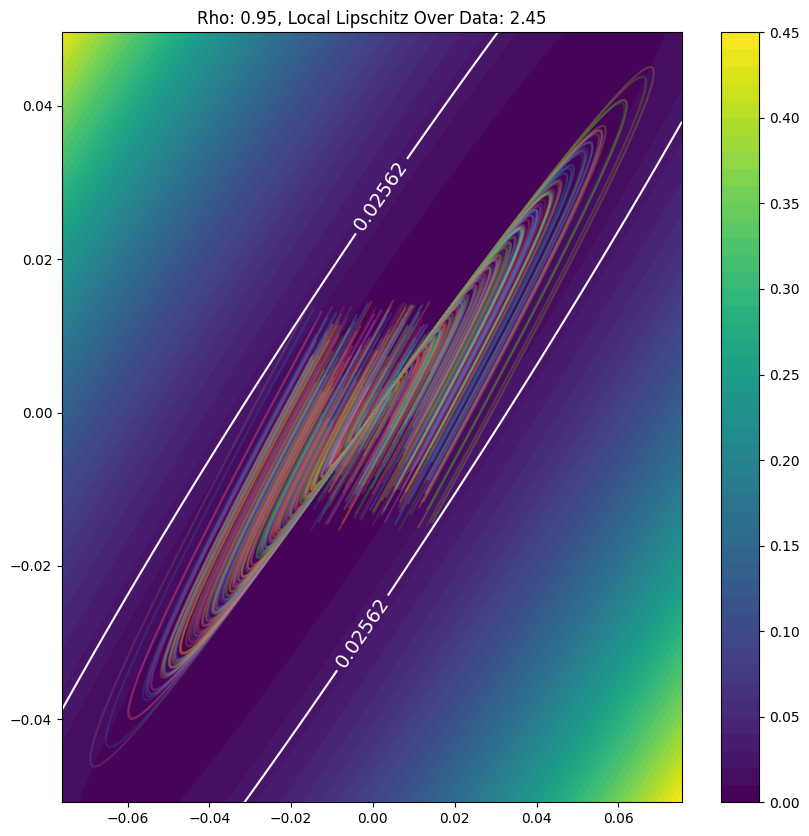

In [37]:
from controls import mlp_lyapunov, mlp_lyapunov_reparam
from experiments import load_experiment
#exp_name="lyap_data"
#z_data = load_experiment(exp_name)
z_eq = ae.encode(torch.tensor([0.,0.,0.,0]).float())
rho = 0.95
V, rho, alpha, lip = mlp_lyapunov_reparam(z_data, epochs=int(0.2e4), lr=1e-4, grid_dens=100, rho=rho, z_eq=z_eq)

In [10]:
#from utils import pickle_object, unpickle_object
from experiments import save_experiment, load_experiment
from controls import Lyapunov

exp_name="lyap_data"
z_data = load_experiment(exp_name)

exp_name="lyap"
V = load_experiment(exp_name)


#lyap_name = "lyap"
#pickle_object(lyap_name, V)
#Vtest = unpickle_object(lyap_name)

0.023484254
0.05


100%|██████████| 100/100 [00:00<00:00, 217.79it/s]


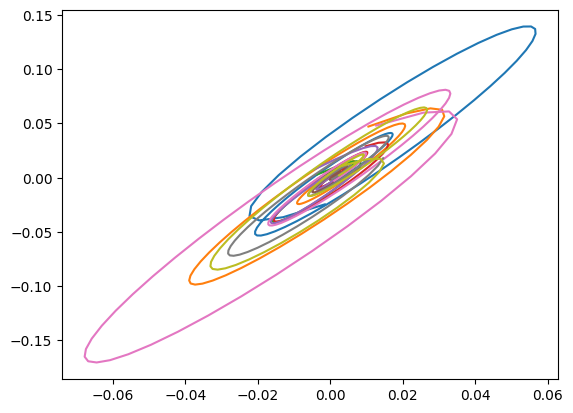

ValueError: too many values to unpack (expected 3)

In [16]:
from controls import validate_mlp_lyapunov
from plotting import plot_lyapunov 


#inner = (alpha - lip*gamma/(1-rho)).item()
print(gamma)
#inner = (alpha - 10*gamma/(0.75)).item()
#inner = 0.2*alpha
inner = 0.05
print(inner)
_, z_proj_data, _ = rollout_trajectories (ae, fdyn, lqr, rz_proj_init, rx_init, plot=True, n_traj=100, T=T, V_filter=V, inner=inner)
plot_lyapunov(z_data, V, rho, [inner, alpha], traj_data=z_proj_data)
plt.title("(V o E)(x(t))")
for z_proj in z_proj_data:
    plt.plot(V(torch.tensor(z_proj)).cpu().detach().numpy())
plt.show()
validate_mlp_lyapunov(z_data, V, rho)

500


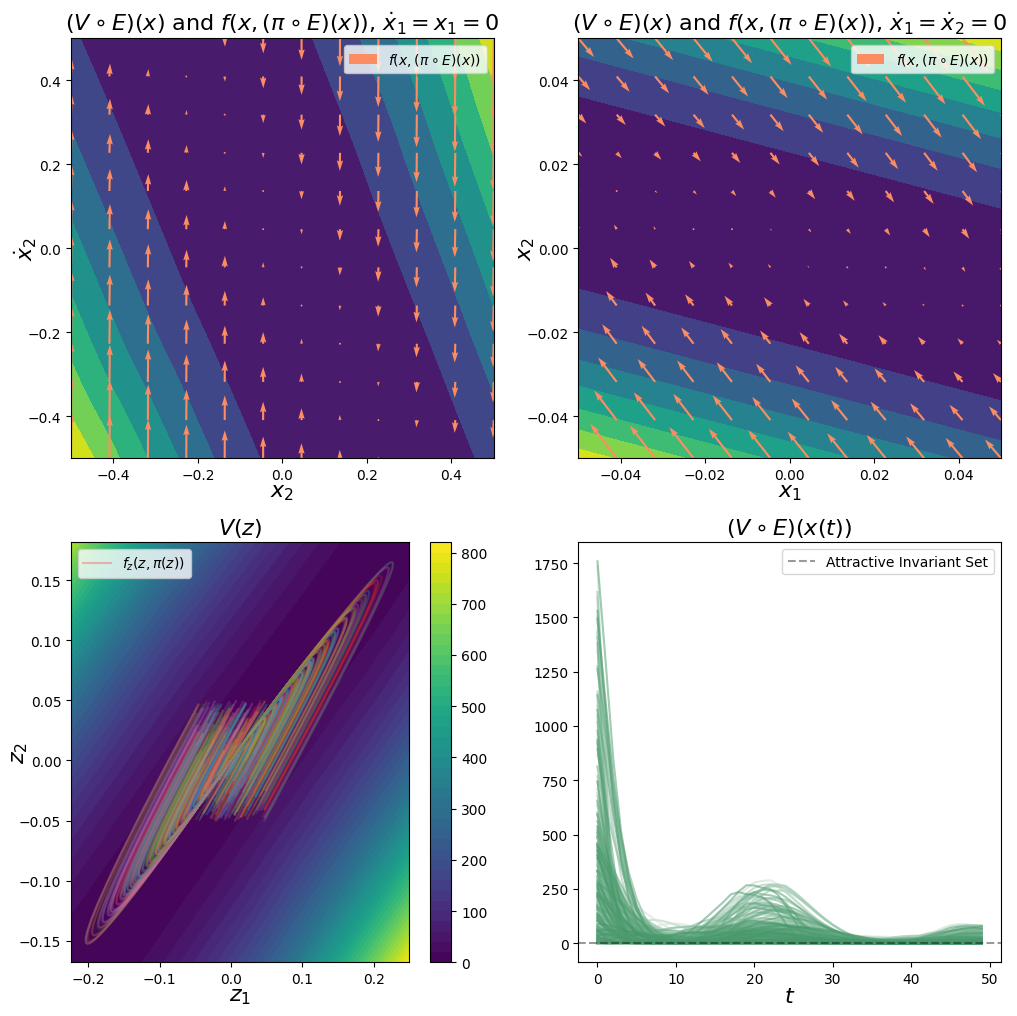

In [17]:
from plotting import plot_lyapunov_slice

lqr = LQR(ae, fdyn)
plot_lyapunov_slice(V, lqr, ae, (0.5, 0.05), (0.5, 0.05), z_data, z_proj_data)


In [94]:
################################
### Plot Latent Vector Field ###
################################
    
from controls import lyapunov_sdp, verify_lyapunov
from scipy.spatial import ConvexHull

hull_idx = ConvexHull(trajectories.reshape(-1, 2)).vertices
hull_pts = trajectories.reshape(-1, 2)[hull_idx]

rho = 0.80
P = lyapunov_sdp(trajectories, hull_pts, b, r, rho, solver='MOSEK')
print(P)
ellipse_spec = ((P, b), hull_pts)
_, test_trajectories = plot_latent_trajectories(ae, fdyn, r_init, N_traj, T=200, plot_quadratic=True, ellipse_spec=ellipse_spec) #r=0.05
print("train violation:", verify_lyapunov(trajectories, P, b, r))
print("test violation:", verify_lyapunov(test_trajectories, P, b, r_test))

NameError: name 'trajectories' is not defined

In [7]:
from videos import latent_projections_video
from controls import LQR
lqr = LQR(ae, fdyn)
latent_projections_video(lqr, ae, fdyn, 0.2, T=500, N=9)

initial x: [ 0.07616166 -0.09661108  0.1708884  -0.01275239]


TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

<Figure size 1300x800 with 0 Axes>

In [21]:
import cvxpy as cp
from scipy.spatial import ConvexHull
from controls import learn_lyapunov

hull_idx = ConvexHull(pts).vertices
hull_pts = pts[hull_idx]
#hull_pts = pts

A = cp.Variable((2, 2), symmetric=True)
b = cp.Variable((2, 1))
obj = cp.log_det(A)
cons = []
cons.append(A >> 0)
for x in hull_pts:
    cons.append(cp.sum_squares(A@x + b) <= 1)
prob = cp.Problem(cp.Maximize(obj), cons)
prob.solve(verbose=True)#, solver='CLARABEL) 

print(A.value)
print(b.value)
A = torch.tensor(A.value).type(torch.float32)
b = torch.tensor(b.value).type(torch.float32)
#spec = (A.value, hull_pts)
#V = torch.linalg.inv(A)
V = A
spec = ( (V, b), torch.tensor(hull_pts).type(torch.float32) )
V, (pts, trajectories) = plot_latent_trajectories(ae, fdyn, 0.1, 200, T=500, plot_quadratic=True, spec=spec) #r=0.05
V = learn_lyapunov(trajectories, V, b)
spec = ( (V, b), torch.tensor(hull_pts).type(torch.float32) )
V, (pts, trajectories) = plot_latent_trajectories(ae, fdyn, 0.1, 200, T=500, plot_quadratic=True, spec=spec) #r=0.05
#V = torch.tensor(V).float()
#b = torch.tensor(0.)
#V = torch.linalg.inv(V @ V)
print(pts.shape)

NameError: name 'pts' is not defined

In [ ]:
from controls import LQR
lqr = LQR(ae, fdyn)
i = 0
j = 0
Vf = torch.tensor(V) #Vf = torch.linalg.inv(torch.tensor(V) @ torch.tensor(V))
b = torch.tensor(b)
for x in pts:
    dv = torch.tensor((2*V @ x).reshape(1, 2)).float()
    x = torch.tensor(x).float()
    u = lqr(x)
    xn = fdyn[0](x).reshape(2, 2) @ x.unsqueeze(1) + fdyn[1](x).reshape(2, 1) @ u.reshape(1, 1) 
    #print(xn.shape)
    #print(x.shape)
    #print(torch.tensor(V).float().shape)
    #b = torch.tensor(b.value).float()
    lyap1 = (xn.reshape(1, 2)) @ torch.tensor(Vf).float() @ (xn.reshape(2, 1)) -\
           (x.reshape(1, 2)) @ torch.tensor(Vf).float() @ (x.reshape(2, 1))
    lyap2 = (xn.reshape(1, 2) - b.reshape(1, 2)) @ torch.tensor(Vf).float() @ (xn.reshape(2, 1) - b.reshape(2, 1)) -\
           (x.reshape(1, 2) - b.reshape(1, 2)) @ torch.tensor(Vf).float() @ (x.reshape(2, 1) - b.reshape(2, 1))
    if lyap1 > 0:
        i += 1
    if lyap2 > 0:
        j += 1
print(i / pts.shape[0])
print(j / pts.shape[0])




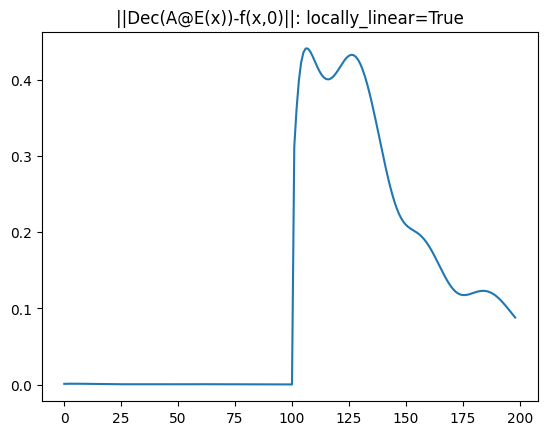

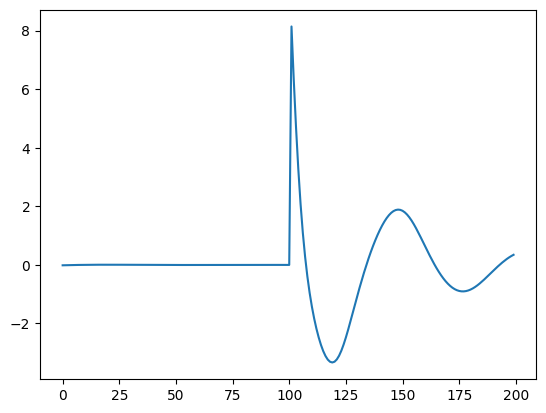

In [32]:
from controls import LQR

lqr = LQR(ae, fdyn)
stabilize_cartpole(lqr, ae, T=1, tmax=200, stabilize=True)

In [ ]:
##########################
### LATENT LQR  BOUNDS ###
##########################

import sys
import os
#print(os.getcwd())
#sys.path.append(os.getcwd())# + '/auto_LiRPA/auto_LiRPA')
print(sys.path)

from collections import defaultdict
from auto_LiRPA import BoundedModule, BoundedTensor
from auto_LiRPA.perturbations import PerturbationLpNorm
from torchvision import transforms
import torch.nn as nn
from integration import _flow_diff
from cartpole import dxdt_torch

z = torch.tensor([[0., 0.]])

class FeedbackDynamics(nn.Module):
    def __init__(self, dynamics, controller, component=0):
        super().__init__()
        self.dynamics = dynamics
        #for param in self.dynamics.parameters():
        #    param.requires_grad = False
        self.controller = controller
        self.component = component
        
    def forward(self, x):
        #print(self.controller(x).shape)
        #print(x.shape)
        x.requires_grad = False
        return self.dynamics( torch.cat((x[0], self.controller(x)[0])).unsqueeze(0))[0,self.component]


class ErrorDynamics(nn.Module):
    def __init__(self, dynamics, controller, ae, component=0):
        super().__init__()
        self.dynamics = dynamics
        #for param in self.dynamics.parameters():
        #    param.requires_grad = False
        self.controller = controller
        self.component = component
        self.ae = ae
        
    def forward(self, x):
        #print(self.controller(x).shape)
        #print(x.shape)
        x.requires_grad = False
        #fdyn_true = LatentDynamics(dxdt_torch, self.controller(x))
        z = self.ae.encode(x)
        true_dynamics = _flow_diff(dxdt_torch, x, lqr(z), params.DT)[0,0]
        return abs(ae.encode(true_dynamics)[self.component] - self.dynamics( torch.cat((z[0], self.controller(z)[0])).unsqueeze(0))[0,self.component])


################
# ENCODE X BOX #
#####################################################################
x_lower = torch.tensor([[-0.01, -0.01, -0.01, -0.01]])
x_upper = torch.tensor([[0.01, 0.01, 0.01, 0.01]])
x = torch.tensor([[0.0, 0.0, 0.0, 0.0]])

fdyn_1 = ErrorDynamics(fdyn, lqr, ae, component=0)
fdyn_2 = ErrorDynamics(fdyn, lqr, ae, component=1)
lirpa_fdyn_1 = BoundedModule(fdyn_1, torch.empty_like(x))
lirpa_fdyn_2 = BoundedModule(fdyn_2, torch.empty_like(x))
#lirpa_enc = BoundedModule(, torch.empty_like(x_lower))

norm_x = float("inf")
ptb_x = PerturbationLpNorm(norm=norm_x, x_L=x_lower, x_U=x_upper)
bounded_x = BoundedTensor(x, ptb_x)

#x_lb, x_ub = lirpa_enc.compute_bounds(x=(bounded_x,), method='IBP')
z1_lb, z1_ub = lirpa_fdyn_1.compute_bounds(x=(bounded_x,), method='IBP')
z2_lb, z2_ub = lirpa_fdyn_2.compute_bounds(x=(bounded_x,), method='IBP')
print(z1_lb, z1_ub)
print(z2_lb, z2_ub)
####################################################################

###################################
# MAX DIVERGENCE IN ENCODED X BOX #
####################################################################
fdyn_1 = ErrorDynamics(fdyn, lqr, component=0)
fdyn_2 = ErrorDynamics(fdyn, lqr, component=1)


lirpa_fdyn_1 = BoundedModule(fdyn_1, torch.empty_like(z))
lirpa_fdyn_2 = BoundedModule(fdyn_2, torch.empty_like(z))

lower = torch.tensor([[-0.1, -0.1]])
upper = torch.tensor([[ 0.1,  0.1]])

norm = float("inf")
ptb = PerturbationLpNorm(norm=norm, x_L=lower, x_U=upper)
bounded_z = BoundedTensor(z, ptb)

lb1, ub1 = lirpa_fdyn_1.compute_bounds(x=(bounded_z,), method='IBP')
lb2, ub2 = lirpa_fdyn_2.compute_bounds(x=(bounded_z,), method='IBP')
print(lb1, ub1)
print(lb2, ub2)
####################################################################


In [ ]:
################################
### BOUNDS FOR TRUE DYNAMICS ###
################################

